In [4]:

""""CNN Classification on handwritten digits(images) with noise """
"""Assignment 4 done by Jonas Wikström"""
#imports!
import random
import math
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [5]:
#Load data set
train = pd.read_csv("data/trainset.csv") 
X_real_test = pd.read_csv("data/testset.csv")
#train = train[0:1000]
#train, test = train_test_split(train, test_size=0.33)

In [3]:
"""Creates a 28x28 matrix instead of a 784 row (Test Data) """
def handleTestData(data):
    testing_data = []
    for index, row in data.iterrows():
        pxl_list = []
        for i in range(28):
            x = 28
            one_row = row[(i*x):((i+1)*x)].values
            pxl_list.append(one_row)
        testing_data.append([pxl_list])
    return(testing_data)

In [11]:
""""#about real testing data""""
testing_data = handleTestData(X_real_test)
real_test_data = np.array(testing_data).reshape(-1,28,28,1) 
real_test_data.shape

(14000, 28, 28, 1)

In [8]:
""""Creates a 28x28 matrix instead of a 784 row and save it with corresponding label (Training data)"""
def createImages(data):
    training_data = []
    x = 28
    for index, row in data.iterrows():
        pxl_list = []
        label = row.iloc[0]
        for i in range(28):
            one_row = row[(i*x+1):((i+1)*x+1)].values
            pxl_list.append(one_row)
        training_data.append([label,pxl_list])
    return(training_data)   
        

In [9]:
"""Prepair training data"""
training_data = createImages(train)
X_train = []
Y_train = []
img_size = 28
for label,image in training_data:
    Y_train.append(label)
    X_train.append(image)
    
Y_train = np.array(Y_train)
X_train = np.array(X_train).reshape(-1,img_size,img_size,1)

#make class vectors, 10 different classes 
Y_train = keras.utils.to_categorical(Y_train, 10)
X_train = X_train.astype('float32')
X_train /= 255

In [1]:
"""
This block is not used at the moment 
Just used it for validating the performance of the model
"""

X_test = []
Y_test = []
test_data = createImages(test)
img_size = 28
for label,image in test_data:
    Y_test.append(label)
    X_test.append(image)
    
Y_test = np.array(Y_test)
X_test = np.array(X_test).reshape(-1,img_size,img_size,1)
Y_test = keras.utils.to_categorical(Y_test, 10)
X_test = X_test.astype('float32')
X_test /= 255

NameError: name 'createImages' is not defined

3
(28000, 28, 28, 1)


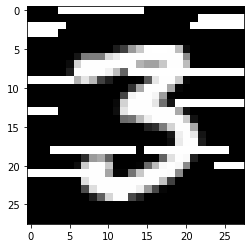

In [8]:
"""Just prints to get an idea of output """

plt.imshow(training_data[155][1], cmap = "gray")
print(training_data[155][0])
print(X_train.shape)

In [15]:
""" I construct the CNN 
Use model.summary() to see the structure of the network

"""

def makeModel():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(32, kernel_size=(2, 2), activation='relu',
                              input_shape=(28,28,1)))
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(10, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adam",
              metrics=['accuracy'])
    return model


model  =  makeModel()
model.fit(x=X_train, y=Y_train, 
         batch_size = 50, 
          epochs = 15);

Train on 28000 samples
Epoch 1/15
28000/28000 [==============================] - 49s 2ms/sample - loss: 0.7324 - accuracy: 0.7587
Epoch 2/15
28000/28000 [==============================] - 59s 2ms/sample - loss: 0.3543 - accuracy: 0.8867
Epoch 3/15
28000/28000 [==============================] - 57s 2ms/sample - loss: 0.2748 - accuracy: 0.9108
Epoch 4/15
28000/28000 [==============================] - 54s 2ms/sample - loss: 0.2328 - accuracy: 0.9258
Epoch 5/15
28000/28000 [==============================] - 50s 2ms/sample - loss: 0.2101 - accuracy: 0.9307
Epoch 6/15
 4400/28000 [===>..........................] - ETA: 40s - loss: 0.1711 - accuracy: 0.9430

KeyboardInterrupt: 

In [12]:
#scores = model.evaluate(X_test, Y_test, verbose=0)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                589888    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 609,354
Trainable params: 609,354
Non-trainable params: 0
________________________________________________

In [32]:
"""We make the predictions and save them to a csv file """
index_list = X_real_test.index.tolist()
index_list = [x+1 for x in index_list]
ynew = model.predict_classes(real_test_data)
pred_df = pd.DataFrame(list(zip(index_list,ynew)), 
               columns =['ImageID', 'Label'])
pred_df.to_csv('samplesubmission.csv', index=False)